**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 &mdash; that should apply to all future assignments so that Canvas assigns the same weight on all assignments.

In the case a question is stated to worth 8 points, grade on a 0-4 scale, and multiply by 2.



In [1]:
# Grader's area

import numpy as np
G = np.zeros([10,10])
maxScore = 0

# **Assignment 6**

In [2]:
from IPython.display import Math
from IPython.display import Latex

import numpy as np
import os
import struct

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

----------------
----------------
----------------

## <font color='blue'> **Question 1.** Visualizing convergence. </font>

Modify this code so that in every epoch it records:

**a.** The test loss. **[4 pt]** <br>
**b.** The training accuracy. **[4 pt]** <br>
**c.** The test accuracy. **[4pt]** 

Then:

**d.** Run the model for 20 epochs and give two plots (one for losses, one for accuracies) for the convergence behavior over 20 epochs. **[4pt]**

<br>

**Note:**
Make sure you avoid updating the weights when you use the test set. For that, you should consult the notebook from CNNs lecture. 




In [3]:
# Importing Pytorch and Torchvision

import torch
from torchvision import transforms
import torchvision

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:04<00:00, 40555475.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# a. The test loss.
# b. The training accuracy.
# c. The test accuracy.

running_loss = 0
loss = 0
loss_test = 0
correct = 0
total = 0
running_loss_test = 0
train_accu = []
train_losses = []
test_accu = []
test_losses = []
correct_test = 0
total_test = 0

for epoch in range(20):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        temp_accu = []
        temp_loss = []
        running_loss = 0

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        accu = 100*correct/total
        temp_accu.append(accu)
        temp_loss.append(loss.item())
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))

    # test

    with torch.no_grad():
        for data in testloader:
            temp_accu = []
            temp_loss = []
            images, labels = data
            outputs = net(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100         
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))
           
print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.000
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.000
[2,  4000] loss: 0.001
[2,  6000] loss: 0.000
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.000
[3,  4000] loss: 0.001
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.000
[3, 12000] loss: 0.001
[4,  2000] loss: 0.000
[4,  4000] loss: 0.001
[4,  6000] loss: 0.001
[4,  8000] loss: 0.000
[4, 10000] loss: 0.001
[4, 12000] loss: 0.001
[5,  2000] loss: 0.001
[5,  4000] loss: 0.000
[5,  6000] loss: 0.001
[5,  8000] loss: 0.001
[5, 10000] loss: 0.000
[5, 12000] loss: 0.001
[6,  2000] loss: 0.000
[6,  4000] loss: 0.001
[6,  6000] loss: 0.001
[6,  8000] loss: 0.000
[6, 10000] loss: 0.000
[6, 12000] loss: 0.001
[7,  2000] loss: 0.001
[7,  4000] loss: 0.000
[7,  6000] loss: 0.000
[7,  8000] loss: 0.000
[7, 10000] loss: 0.000
[7, 12000] loss: 0.001
[8,  2000] loss: 0.000
[8,  4000] 

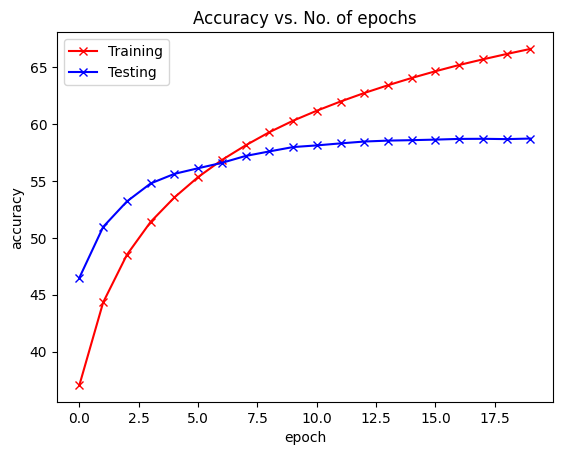

In [8]:
# d. Run the model for 20 epochs and give two plots (one for losses, one for accuracies)
#    for the convergence behavior over 20 epochs.

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

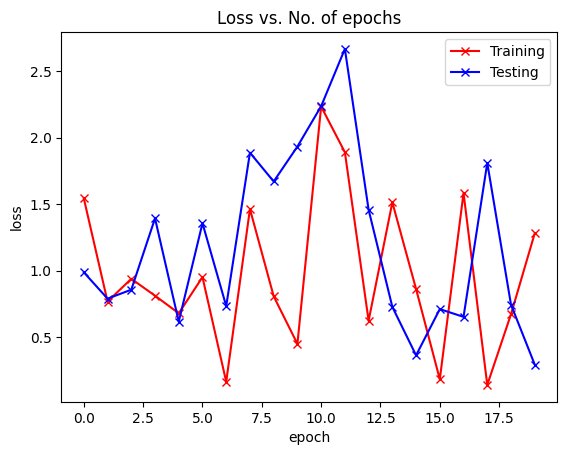

In [9]:
Training_Loss = [x for x in train_losses]
Testing_Loss = [y for y in test_losses]
plt.plot(Training_Loss, '-rx')
plt.plot(Testing_Loss, '-bx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Testing'])
plt.title('Loss vs. No. of epochs');

In [10]:
# For grader use only
# Insert grade here

# G[1,1] =   
# G[1,2] = 
# G[1,3] =
# G[1,4] = 

maxScore = maxScore + 16

------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 2.** Learning random labels. </font>

Reuse the above code, but instead of using the given input labels on the training set, use random labels. Then run for 40 epochs. 
<br>

**a.** Report the plots for the training accuracy. **[4 pt]** <br>
**b.** What is the final training accuracy? **[4 pt]** <br>
**c.** What would be the expected accuracy for a random baseline model? **[4 pt]**





In [11]:
running_loss = 0
loss = 0
loss_test = 0
correct = 0
total = 0
running_loss_test = 0
train_accu = []
train_losses = []
test_accu = []
test_losses = []
correct_test = 0
total_test = 0

for epoch in range(40):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        temp_accu = []
        temp_loss = []
        running_loss = 0

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = torch.randint(0, 9, (4,))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        accu = 100*correct/total
        temp_accu.append(accu)
        temp_loss.append(loss.item())
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))

    # test

    with torch.no_grad():
        for data in testloader:
            temp_accu = []
            temp_loss = []
            images, labels = data
            outputs = net(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100         
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))
           
print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.001
[1,  8000] loss: 0.001
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.001
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.001
[3,  4000] loss: 0.001
[3,  6000] loss: 0.001
[3,  8000] loss: 0.001
[3, 10000] loss: 0.001
[3, 12000] loss: 0.001
[4,  2000] loss: 0.001
[4,  4000] loss: 0.001
[4,  6000] loss: 0.001
[4,  8000] loss: 0.001
[4, 10000] loss: 0.001
[4, 12000] loss: 0.001
[5,  2000] loss: 0.001
[5,  4000] loss: 0.001
[5,  6000] loss: 0.001
[5,  8000] loss: 0.001
[5, 10000] loss: 0.001
[5, 12000] loss: 0.001
[6,  2000] loss: 0.001
[6,  4000] loss: 0.001
[6,  6000] loss: 0.001
[6,  8000] loss: 0.001
[6, 10000] loss: 0.001
[6, 12000] loss: 0.001
[7,  2000] loss: 0.001
[7,  4000] loss: 0.001
[7,  6000] loss: 0.001
[7,  8000] loss: 0.001
[7, 10000] loss: 0.001
[7, 12000] loss: 0.001
[8,  2000] loss: 0.001
[8,  4000] 

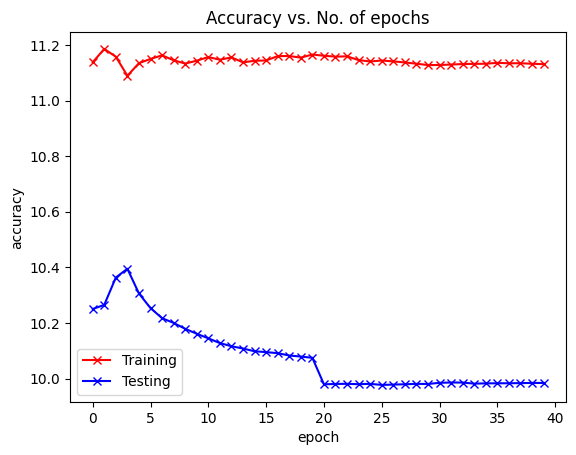

In [12]:
# a. Report the plots for the training accuracy.

import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [13]:
# b. What is the final training accuracy?

print("Final training accuracy is : ",np.mean(train_accu))

Final training accuracy is :  11.14347991584213


In [14]:
# c. What would be the expected accuracy for a random baseline model?

# The expected accuracy for a random baseline model will be 10% as there only 
# 10 possible labels (1 must be assigned to any input)

In [15]:
# For grader use only

# Insert grade here
# G[2,1] =   
# G[2,2] = 
# G[2,3] =

maxScore = maxScore + 12

------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 3.** Modifying the model for MNIST. </font>

Let's now work with the MNIST dataset. 
<br>

**a.** Download and prepare the dataloaders for the standard MNIST dataset. **[4 pt]** <br>
**b.** Modify the model so that it works with the MNIST dataset. The inner array sizes should be roughly similar, but you can adjust them in the way you choose. **[8 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs. **[4 pt]**





In [16]:
# a. Download and prepare the dataloaders for the standard MNIST dataset.

train_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)

test_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 124830993.12it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34267523.01it/s]


Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 35588754.05it/s]


Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6734015.12it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [17]:
# b. Modify the model so that it works with the MNIST dataset.
#    The inner array sizes should be roughly similar, but you can adjust them in the way you choose.

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)
        return pred

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [21]:
# c. Report the training and test accuracy after 10 epochs.

running_loss = 0
loss = 0
loss_test = 0
correct = 0
total = 0
running_loss_test = 0
train_accu = []
train_losses = []
test_accu = []
test_losses = []
correct_test = 0
total_test = 0

for epoch in range(10):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader_MNIST, 0):
        temp_accu = []
        temp_loss = []
        running_loss = 0

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        accu = 100*correct/total
        temp_accu.append(accu)
        temp_loss.append(loss.item())
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
    
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))

    # test

    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu=[]
            temp_loss=[]
            images, labels = data
            outputs = net(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100        
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))
           
print('Finished Training')

Finished Training


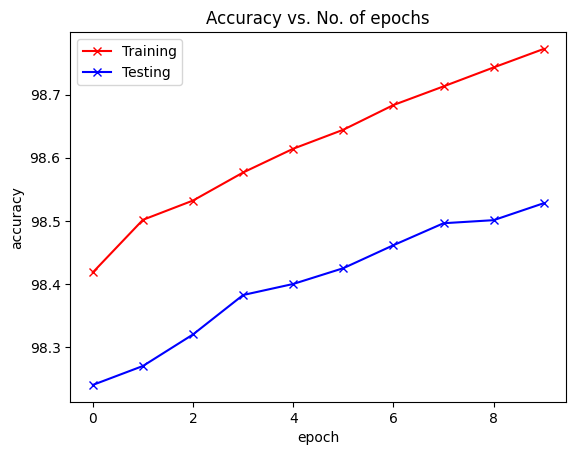

In [22]:
import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [23]:
print("Final training accuracy is : ", np.mean(train_accu))
print("Final testing accuracy is : ", np.mean(test_accu))

Final training accuracy is :  98.62000112433863
Final testing accuracy is :  98.40242896825397


In [24]:
# For grader use only

# Insert grade here
# G[3,1] =   
# G[3,2] = 
# G[3,3] =

maxScore = maxScore + 16

------------------------------
------------------------------
------------------------------

## <font color='blue'> **Question 4.** MNIST on randomly permuted images. </font>

In this question we will see whether a CNN remains as effective for randomly permuted images. 
<br>

**a.** Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch. This should be 2-3 lines of code &mdash; feel free to discuss it on Canvas. **[4 pt]** <br>
**b.** Train the model from question 3 on a training set where the images in the training set have re-arranged in a **random** way, which however is the **same** across all images. **[8 pt]** <br>
**c.** Report the training and test accuracy after 10 epochs, and after 20 epochs. **[4 pt]**



In [25]:
# a. Find a way to randomly permute the entries of a 2d array in numpy or a 2d tensor in PyTorch.

trainset_example=torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ]))
train_loader_MNIST_example = torch.utils.data.DataLoader(trainset , batch_size=64, shuffle=True)

for i, data in enumerate(train_loader_MNIST_example,0):  
    inputs, labels = data
    t = inputs
    print("Size before randomizing: ", t.size())
    print(t.data)
    idx = torch.randperm(t.nelement())
    t = t.view(-1)[idx].view(t.size())
    print("Size after randomizing: ", t.size())
    inputs = t
    print(t.data)
    if i==1:
        break

Size before randomizing:  torch.Size([64, 3, 32, 32])
tensor([[[[-0.0353, -0.0275, -0.0667,  ...,  0.0745,  0.0510,  0.0039],
          [ 0.0353,  0.0039, -0.0275,  ...,  0.0275, -0.0118,  0.0039],
          [ 0.2157,  0.0588, -0.0118,  ...,  0.0196,  0.0275,  0.0196],
          ...,
          [ 0.1608,  0.1059,  0.0980,  ...,  0.4902,  0.3882,  0.2157],
          [ 0.4196,  0.3569,  0.3020,  ...,  0.2941,  0.2627,  0.0824],
          [ 0.3961,  0.2784,  0.2000,  ...,  0.0667,  0.1451,  0.0275]],

         [[ 0.0824,  0.1451,  0.1373,  ...,  0.1451,  0.1216,  0.0745],
          [ 0.1451,  0.1608,  0.1608,  ...,  0.1294,  0.0902,  0.1137],
          [ 0.3255,  0.2000,  0.1294,  ...,  0.1137,  0.1216,  0.1059],
          ...,
          [ 0.1843,  0.1137,  0.0902,  ...,  0.4431,  0.3412,  0.1686],
          [ 0.4039,  0.3412,  0.2863,  ...,  0.2157,  0.1922,  0.0039],
          [ 0.3725,  0.2627,  0.1843,  ..., -0.0275,  0.0588, -0.0510]],

         [[-0.2784, -0.2706, -0.3098,  ..., -0.1

In [26]:
trainset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize((0.1307,), (0.3081,))   ]))
train_loader_MNIST_rnd = torch.utils.data.DataLoader(trainset , batch_size=64, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))   ])),
  batch_size=64, shuffle=True)

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_1 = torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv_2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.max_pool2d = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear_1 = torch.nn.Linear(7 * 7 * 64, 128)
        self.linear_2 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(p=0.5)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv_2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = x.reshape(x.size(0), -1)
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.dropout(x)
        pred = self.linear_2(x)
        return pred

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [28]:
# b. Train the model from question 3 on a training set where the images in the training 
#    set have re-arranged in a random way, which however is the same across all images.
# c. Report the training and test accuracy after 10 epochs, and after 20 epochs.

running_loss = 0
loss = 0
loss_test = 0
correct = 0
total = 0
running_loss_test = 0
train_accu = []
train_losses = []
test_accu = []
test_losses = []
correct_test = 0
total_test = 0
torch.manual_seed(0)

for epoch in range(10):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader_MNIST, 0):
        temp_accu = []
        temp_loss = []
        running_loss = 0

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        t = inputs
        idx = torch.randperm(t.nelement())
        t = t.view(-1)[idx].view(t.size())
        inputs=t

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        accu = 100*correct/total
        temp_accu.append(accu)
        temp_loss.append(loss.item())
    
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))

    # test

    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu = []
            temp_loss = []
            images, labels = data
            t = images
            idx = torch.randperm(t.nelement())
            t = t.view(-1)[idx].view(t.size())
            images = t
            outputs = net(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100         
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))
           
print('Finished Training')

Finished Training


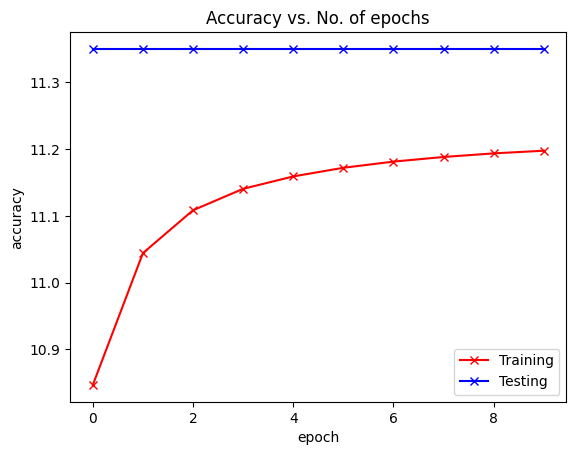

In [29]:
import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [30]:
running_loss = 0
loss = 0
loss_test = 0
correct = 0
total = 0
running_loss_test = 0
train_accu = []
train_losses = []
test_accu = []
test_losses = []
correct_test = 0
total_test = 0
torch.manual_seed(0)

for epoch in range(20):  # loop over the dataset multiple times

    for i, data in enumerate(train_loader_MNIST_rnd, 0):
        temp_accu = []
        temp_loss = []
        running_loss = 0

        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        t = inputs
        idx = torch.randperm(t.nelement())
        t = t.view(-1)[idx].view(t.size())
        inputs=t

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        accu = 100*correct/total
        temp_accu.append(accu)
        temp_loss.append(loss.item())
    
    train_accu.append(np.mean(temp_accu))
    train_losses.append(np.mean(temp_loss))

    # test

    with torch.no_grad():
        for data in test_loader_MNIST:
            temp_accu = []
            temp_loss = []
            images, labels = data
            t = images
            idx = torch.randperm(t.nelement())
            t = t.view(-1)[idx].view(t.size())
            images = t
            outputs = net(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            accu_test = correct_test / total_test * 100         
            temp_accu.append(accu_test)
            temp_loss.append(loss_test.item())
    test_accu.append(np.mean(temp_accu))
    test_losses.append(np.mean(temp_loss))
           
print('Finished Training')

Finished Training


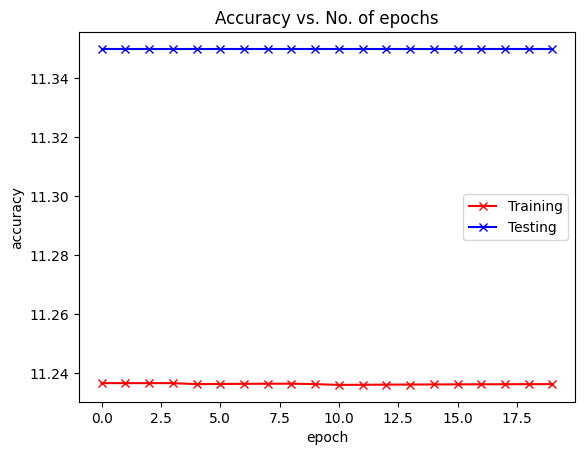

In [31]:
import matplotlib.pyplot as plt
Training_Accuracies = [x for x in train_accu]
Testing_accuracies = [y for y in test_accu]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Testing_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Testing'])
plt.title('Accuracy vs. No. of epochs');

In [32]:
# For grader use only
# Insert grade here

# G[4,1] =   
# G[4,2] = 
# G[4,3] =

maxScore = maxScore + 16

In [33]:
# For grader use
# Total Grade Calculation

rawScore = np.sum(G)
score = rawScore*100/maxScore